# Insights about air pollution
### Step 1: Necessary Importing (libraries and data )

In [102]:

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data_date.csv")
data

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
13380,2024-06-13,Uzbekistan,Good,35
13381,2024-06-13,Vatican,Good,38
13382,2024-06-13,Venezuela,Good,23
13383,2024-06-13,Vietnam,Moderate,52


## Step 2: Cleaning Data

In [110]:
#Changing the type of the date column from object into DateTime
data['Date'] = pd.to_datetime(data['Date'])

# check for the availability of any null values in the dataset
null_values = data.isnull().sum()
null_values

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

## Step 3: Deriving Data Insights

### -> Countries with poorest Air Quality

In [104]:
avg = data.groupby("Country").agg({"AQI Value":"mean"}).reset_index()
sorted_avg = avg.sort_values(by= "AQI Value", ascending= False ).head(15)
sorted_avg


,Country,AQI Value
59,India,191.260417
28,China,172.760417
62,Iraq,167.500000
107,Qatar,157.408602
61,Iran,155.600000
40,Ethiopia,155.000000
10,Bangladesh,137.770833
9,Bahrain,135.448276
73,Kuwait,129.479167
134,United Arab Emirates,124.937500


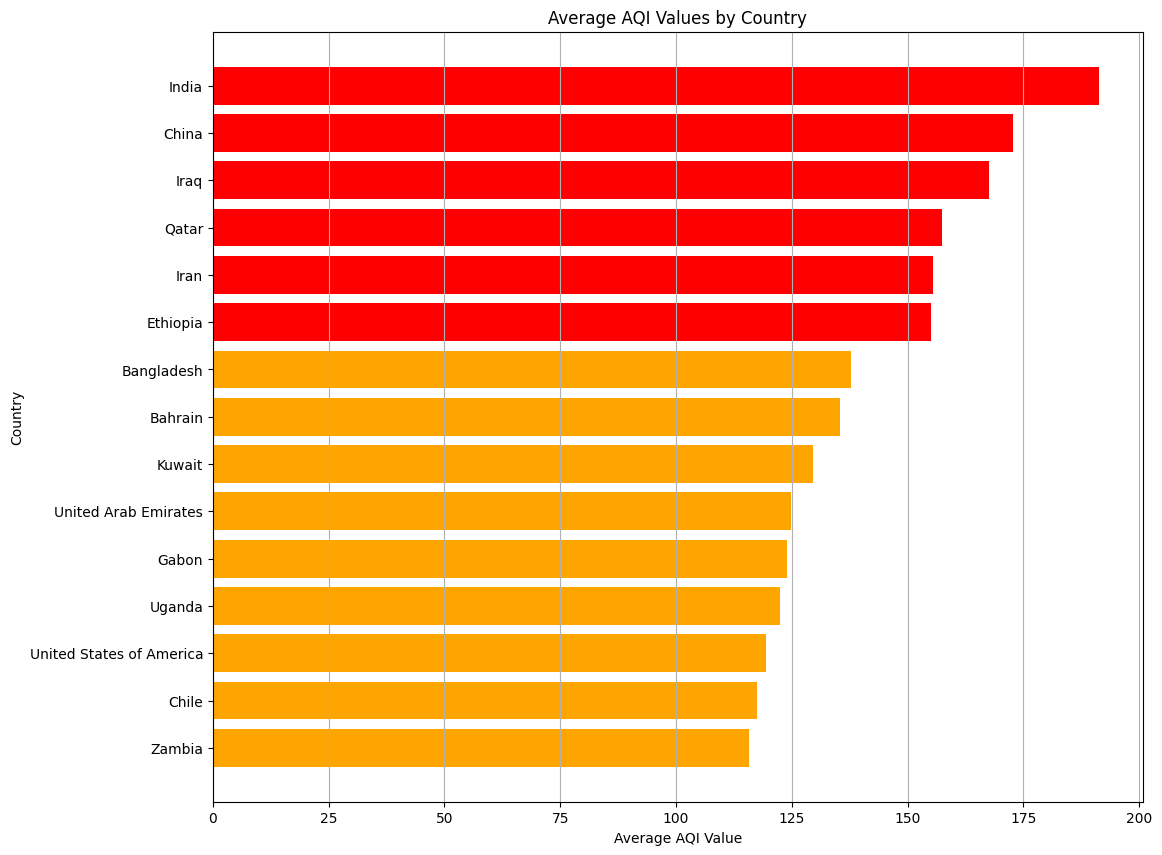

In [109]:
colors = ['red' if i < 6 else 'orange' for i in range(len(sorted_avg))]
plt.figure(figsize=(12, 10))
plt.barh(sorted_avg['Country'], sorted_avg['AQI Value'], color=colors)
plt.title('Average AQI Values by Country')
plt.xlabel('Average AQI Value')
plt.ylabel('Country')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

##### Key Observtion:
   1. 6 Countries (India, China, Iraq, Qatar, Iran and Ethiopia) fall in the "Unhealthy" Category
   2. All the other countries fall in the "Unhealthy for Sensitive Groups"

### -> Countries with the best Air Quality 

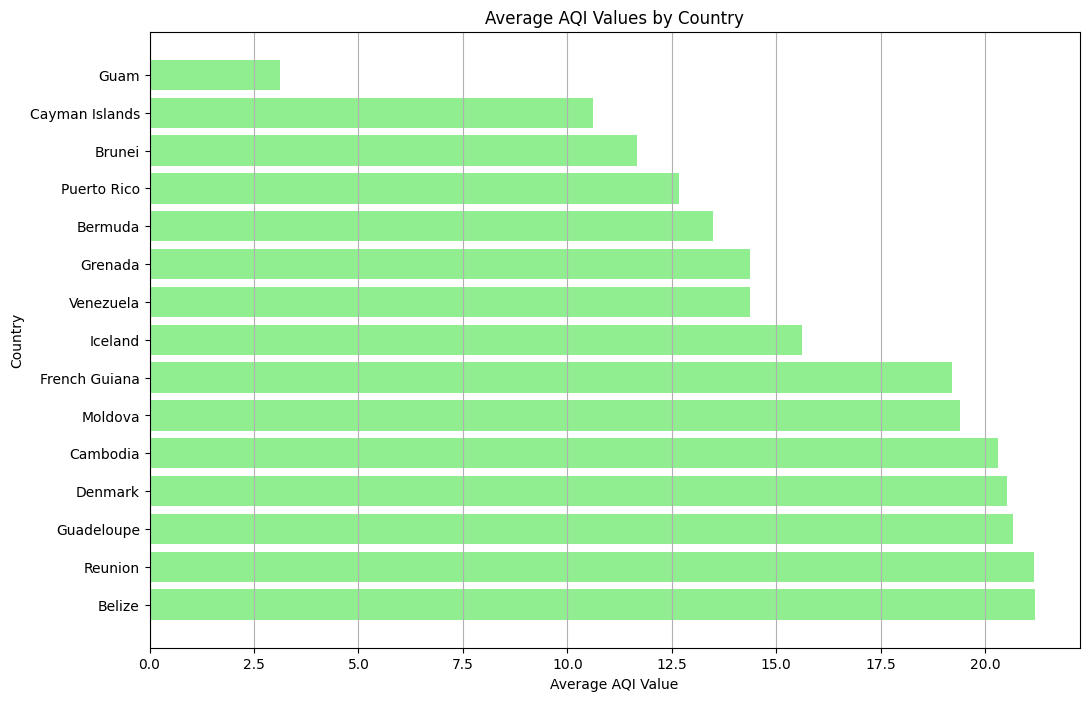

In [106]:
sorted_avg_best = avg.sort_values(by= "AQI Value", ascending= True ).head(15)
sorted_avg_best

plt.figure(figsize=(12, 8))
plt.barh(sorted_avg_best['Country'], sorted_avg_best['AQI Value'], color = 'lightgreen')
plt.title('Average AQI Values by Country')
plt.xlabel('Average AQI Value')
plt.ylabel('Country')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

### -> Percentages of the categories

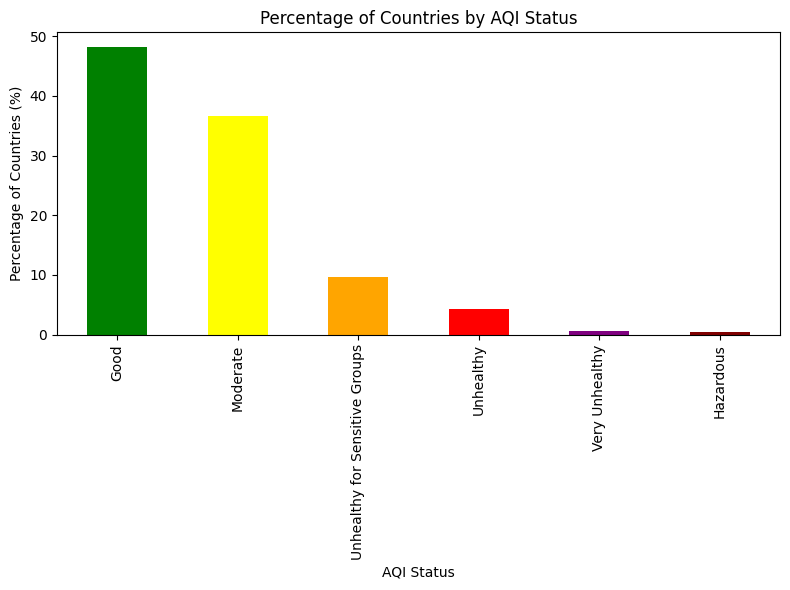

In [108]:
status_counts = data['Status'].value_counts(normalize=True) * 100
colors = {'Good': 'green', 'Moderate': 'yellow', 'Unhealthy for Sensitive Groups': 'orange', 'Unhealthy': 'red', 'Very Unhealthy': 'purple' , 'Hazardous': 'maroon'}
# Plotting the bar graph
plt.figure(figsize=(8, 6))
#status_counts.plot(kind='bar', color='skyblue')
status_counts.plot(kind='bar', color=[colors.get(status, 'skyblue') for status in status_counts.index])
plt.title('Percentage of Countries by AQI Status')
plt.xlabel('AQI Status')
plt.ylabel('Percentage of Countries (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()